In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
daily_activity = pd.read_csv(r"C:\Users\KAREN J FERNANDES\anaconda3\Files\Bellabeat\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")
sleep_day = pd.read_csv(r"C:\Users\KAREN J FERNANDES\anaconda3\Files\Bellabeat\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv")
weight_log_info = pd.read_csv(r"C:\Users\KAREN J FERNANDES\anaconda3\Files\Bellabeat\Fitabase Data 4.12.16-5.12.16\weightLogInfo_merged.csv")
hourly_intensity = pd.read_csv(r"C:\Users\KAREN J FERNANDES\anaconda3\Files\Bellabeat\Fitabase Data 4.12.16-5.12.16\hourlyIntensities_merged.csv")

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
weight_log_info.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [6]:
hourly_intensity.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


### Data Cleaning

In [7]:
#function to check for shape

dataframes = [daily_activity, sleep_day, weight_log_info, hourly_intensity]

for df in dataframes:
    print(df.shape)
    print()

(940, 15)

(413, 5)

(67, 8)

(22099, 4)



In [8]:
#function to check for nulls

dataframes = [daily_activity, sleep_day, weight_log_info, hourly_intensity]

for df in dataframes:
    print(df.isnull().sum())
    print()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64



In [9]:
# dropping fat column
weight_log_info.drop(columns = ['Fat'], inplace = True)

In [10]:
weight_log_info.columns

Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'BMI', 'IsManualReport',
       'LogId'],
      dtype='object')

In [11]:
#function to check for duplicates

dataframes = [daily_activity, sleep_day, weight_log_info, hourly_intensity]

for df in dataframes:
    print(df.duplicated().sum())
    print()

0

3

0

0



In [12]:
# Deleting duplicates
sleep_day1 = sleep_day.drop_duplicates()

In [13]:
sleep_day1.duplicated().sum()

0

In [14]:
#function to check the datatypes

dataframes = [daily_activity, sleep_day1, weight_log_info, hourly_intensity]

for df in dataframes:
    print(df.dtypes)
    print()

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

Id                    int64
ActivityHour         object
TotalIntensity        int64
Aver

In [15]:
# Formatting String Date datatype to Date time datatype
dataframes = [daily_activity, sleep_day1, weight_log_info, hourly_intensity]
columns_to_convert = ['ActivityDate', 'SleepDay', 'Date', 'ActivityHour']

for df, column in zip(dataframes, columns_to_convert):
    df[column] = pd.to_datetime(df[column])
    print(df.dtypes)
    print()

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

Id                             int64
SleepDay              datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object

Id                         int64
Date              datetime64[ns]
WeightKg                 float64
WeightPounds             float64
BMI     

C:\Users\KAREN J FERNANDES\AppData\Local\Temp\ipykernel_18452\4263361336.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])
C:\Users\KAREN J FERNANDES\AppData\Local\Temp\ipykernel_18452\4263361336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_datetime(df[column])
C:\Users\KAREN J FERNANDES\AppData\Local\Temp\ipykernel_18452\4263361336.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_da

Id                           int64
ActivityHour        datetime64[ns]
TotalIntensity               int64
AverageIntensity           float64
dtype: object



In [16]:
#converting minutes to hours
sleep_day1['TotalHoursAsleep'] = sleep_day1['TotalMinutesAsleep'].apply(lambda x: x/60)
sleep_day1.head()

C:\Users\KAREN J FERNANDES\AppData\Local\Temp\ipykernel_18452\1671633527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_day1['TotalHoursAsleep'] = sleep_day1['TotalMinutesAsleep'].apply(lambda x: x/60)


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep
0,1503960366,2016-04-12,1,327,346,5.450000
1,1503960366,2016-04-13,2,384,407,6.400000
2,1503960366,2016-04-15,1,412,442,6.866667
3,1503960366,2016-04-16,2,340,367,5.666667
4,1503960366,2016-04-17,1,700,712,11.666667


In [17]:
#separting date and time from activityhour

hourly_intensity['ActivityHour'] = pd.to_datetime(hourly_intensity['ActivityHour'], format='%Y/%m/%d %I:%M:%S %p')

hourly_intensity['Date'] = hourly_intensity['ActivityHour'].dt.strftime('%Y/%m/%d')
hourly_intensity['Time'] = hourly_intensity['ActivityHour'].dt.strftime('%I:%M:%S %p')

hourly_intensity.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,Date,Time
0,1503960366,2016-04-12 00:00:00,20,0.333333,2016/04/12,12:00:00 AM
1,1503960366,2016-04-12 01:00:00,8,0.133333,2016/04/12,01:00:00 AM
2,1503960366,2016-04-12 02:00:00,7,0.116667,2016/04/12,02:00:00 AM
3,1503960366,2016-04-12 03:00:00,0,0.000000,2016/04/12,03:00:00 AM
4,1503960366,2016-04-12 04:00:00,0,0.000000,2016/04/12,04:00:00 AM


In [18]:
# Creating a new column for weekdays
daily_activity['WeekDays'] = daily_activity['ActivityDate'].dt.day_name()
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,WeekDays
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [19]:
# merging daily_activity and sleep_day1
daily_activity_sleep = pd.merge(daily_activity, sleep_day1, on=['Id'])
daily_activity_sleep.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,WeekDays,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,Tuesday,2016-04-12,1,327,346,5.450000
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,Tuesday,2016-04-13,2,384,407,6.400000
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,Tuesday,2016-04-15,1,412,442,6.866667
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,Tuesday,2016-04-16,2,340,367,5.666667
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,Tuesday,2016-04-17,1,700,712,11.666667


In [20]:
# merging daily_activity and weight_log_info
daily_activity_weight = pd.merge(daily_activity, weight_log_info, on=['Id'])
daily_activity_weight.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,WeekDays,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,328,728,1985,Tuesday,2016-05-02 23:59:59,52.599998,115.963147,22.65,True,1462233599000
1,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,328,728,1985,Tuesday,2016-05-03 23:59:59,52.599998,115.963147,22.65,True,1462319999000
2,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,217,776,1797,Wednesday,2016-05-02 23:59:59,52.599998,115.963147,22.65,True,1462233599000
3,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,217,776,1797,Wednesday,2016-05-03 23:59:59,52.599998,115.963147,22.65,True,1462319999000
4,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,181,1218,1776,Thursday,2016-05-02 23:59:59,52.599998,115.963147,22.65,True,1462233599000


### Data Visualization
#### 1.0 Total Steps Vs Sleep
Let's take a look at how the total steps taken will influence how many hours the users will sleep.

In [21]:
palette = sns.set_palette(sns.color_palette("Set2"))

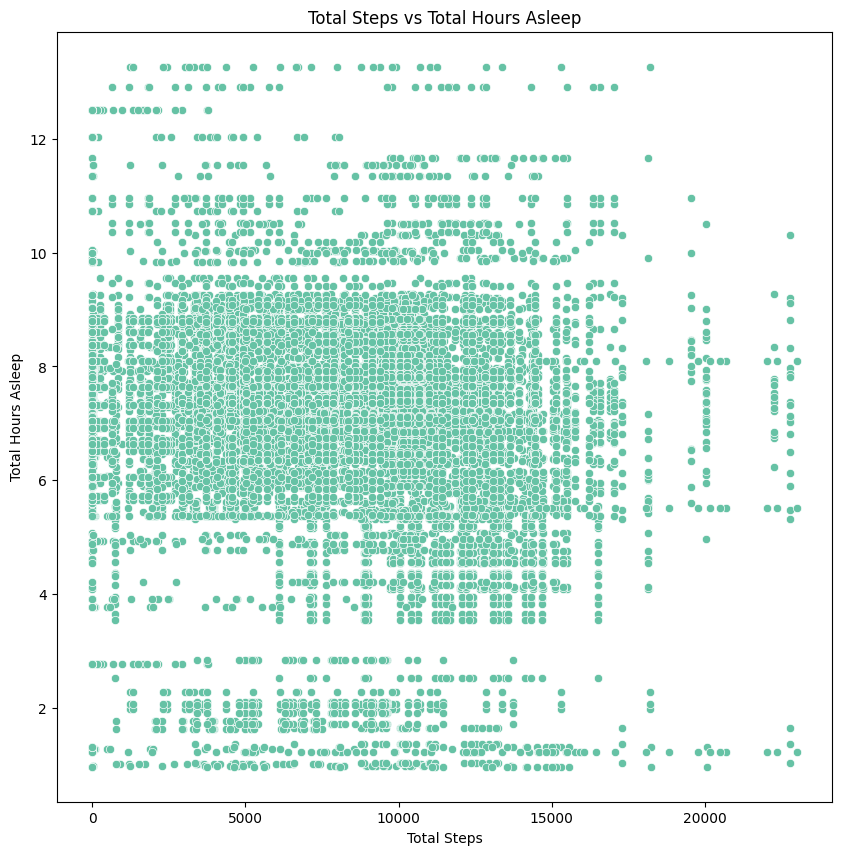

In [22]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='TotalSteps', y='TotalHoursAsleep', data = daily_activity_sleep)
plt.xlabel('Total Steps')
plt.ylabel('Total Hours Asleep')
plt.title('Total Steps vs Total Hours Asleep')
plt.grid(False)
plt.show()

We observe from the graph that the Total steps taken don’t necessarily mean that the person will have a better sleep or the number of hours would be longer than usual.

#### 2.0 Total Steps Vs Weekday
We shall now take a look at which day the users are most and least active.

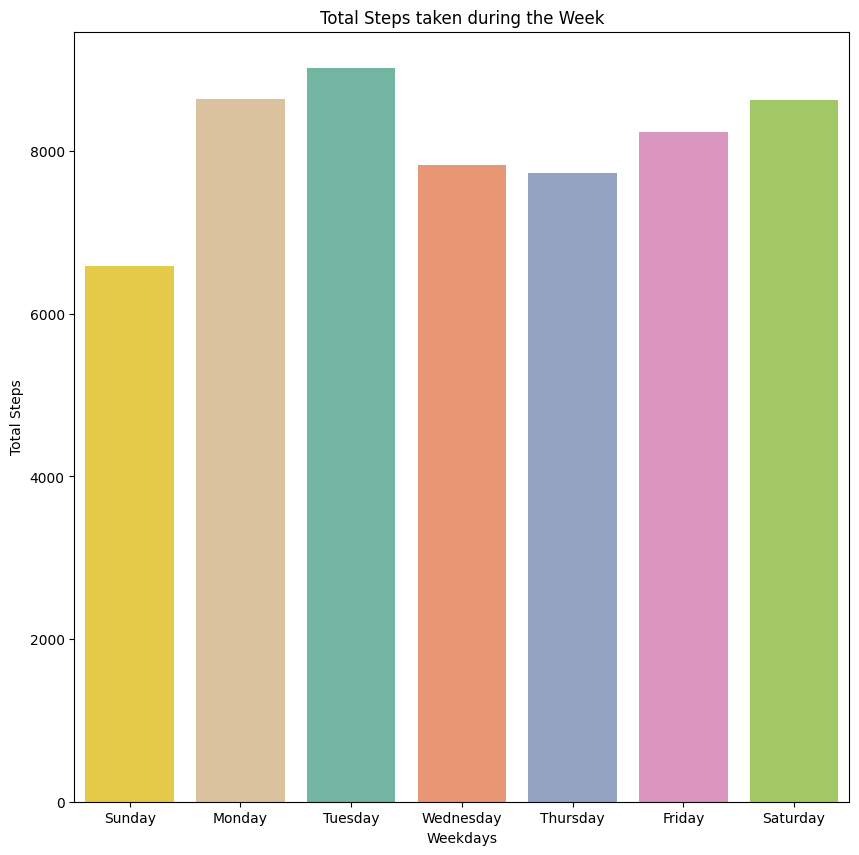

In [23]:
plt.figure(figsize=(10,10))
weekdays_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sns.barplot(x='WeekDays', y='TotalSteps', data=daily_activity_sleep, hue='WeekDays', order=weekdays_order, errorbar=None)
plt.xlabel('Weekdays')
plt.ylabel('Total Steps')
plt.title('Total Steps taken during the Week')
plt.show()

We can see that the users are most active when the weekend starts and the activity level drops on 
Sunday, this could be a day of reset for users.

#### 3.0  Sleep Distribution 
According to Mayoclinic, if one gets:

* Less than 7 hours: Insufficient
* 7 to 8 hours: Well rested
* More than 8 hours: Overslept

In [24]:
sleep_day1['sleep_log'] = sleep_day1['TotalHoursAsleep'].apply(lambda x: 'Less than 7 hours' if x < 7 else ('7 to 8 hours' if 7 <= x < 8 else 'More than 8 hours'))
sleep_day1.head()

C:\Users\KAREN J FERNANDES\AppData\Local\Temp\ipykernel_18452\4022637558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_day1['sleep_log'] = sleep_day1['TotalHoursAsleep'].apply(lambda x: 'Less than 7 hours' if x < 7 else ('7 to 8 hours' if 7 <= x < 8 else 'More than 8 hours'))


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,sleep_log
0,1503960366,2016-04-12,1,327,346,5.450000,Less than 7 hours
1,1503960366,2016-04-13,2,384,407,6.400000,Less than 7 hours
2,1503960366,2016-04-15,1,412,442,6.866667,Less than 7 hours
3,1503960366,2016-04-16,2,340,367,5.666667,Less than 7 hours
4,1503960366,2016-04-17,1,700,712,11.666667,More than 8 hours


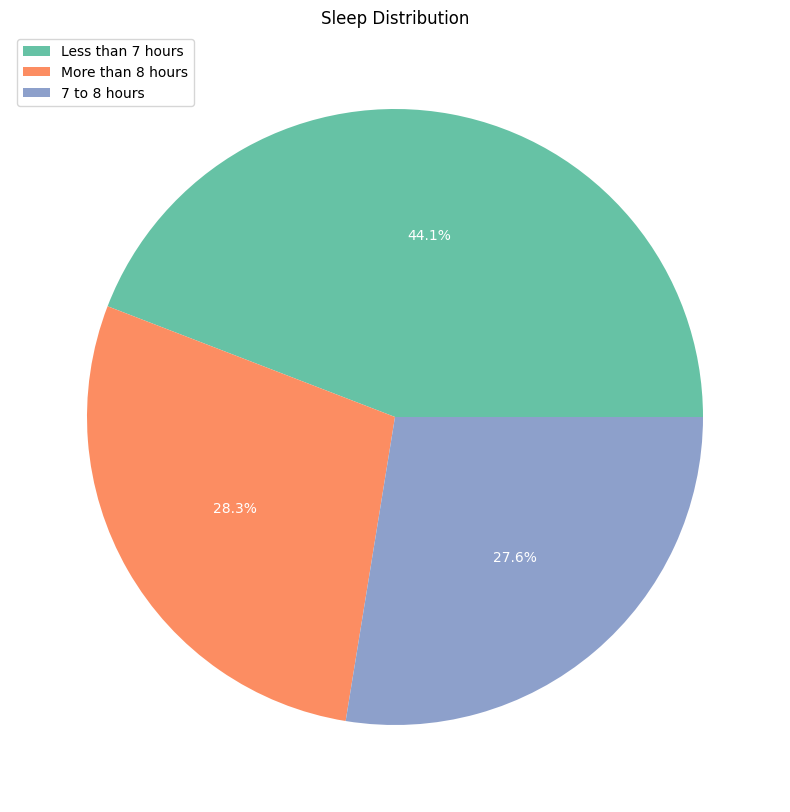

In [25]:
sleep_log_count = sleep_day1['sleep_log'].value_counts()

plt.figure(figsize = (10,10))
plt.pie(sleep_log_count, labels = None, autopct='%1.1f%%', textprops={'color': 'white'})
plt.title('Sleep Distribution')
plt.legend(labels=sleep_log_count.index, loc = 'upper left')
plt.show()

From the pie chart, we can see that only about 27.6% of the users sleep for a sufficient amount of 7 to 8 hours whereas 44.1% sleep for less than 7 hours.

#### 4.0 Total Steps Vs Calories 
Based on the number of steps the user has taken, let's find out how many calories they have burned and if there is a correlation between the two.

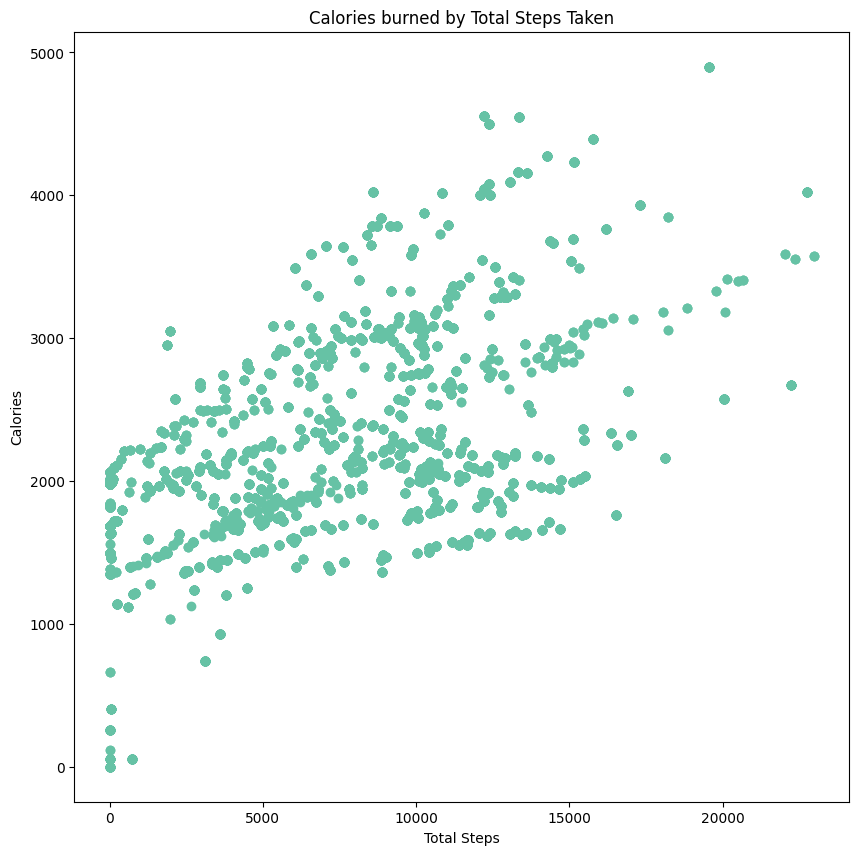

In [26]:
plt.figure(figsize = (10,10))
plt.scatter(x='TotalSteps', y='Calories', data=daily_activity_sleep)
plt.title('Calories burned by Total Steps Taken')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.show()

From the graph, we can see that there is a correlation between Total Steps and Calories. When the user takes more number of steps, more calories are burned.

#### 5.0 BMI Distribution 
According to standard BMI values from hdfclife we have,

* Underweight: BMI less than 18.5
* Normal weight: BMI between 18.5 and 24
* Overweight: BMI between 25 and 29.9
* Obese: BMI above 30

In [27]:
weight_log_info['bmi_log'] = weight_log_info['BMI'].apply(lambda x: 
                        'Underweight' if x < 18.5 else 
                        ('Normal weight' if 18.5 <= x <= 24 else 
                        ('Overweight' if 25 <= x <= 29.9 else 'Obesity')))
weight_log_info.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId,bmi_log
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.650000,True,1462233599000,Normal weight
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,22.650000,True,1462319999000,Normal weight
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,47.540001,False,1460509732000,Obesity
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,21.450001,True,1461283199000,Normal weight
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,21.690001,True,1463097599000,Normal weight


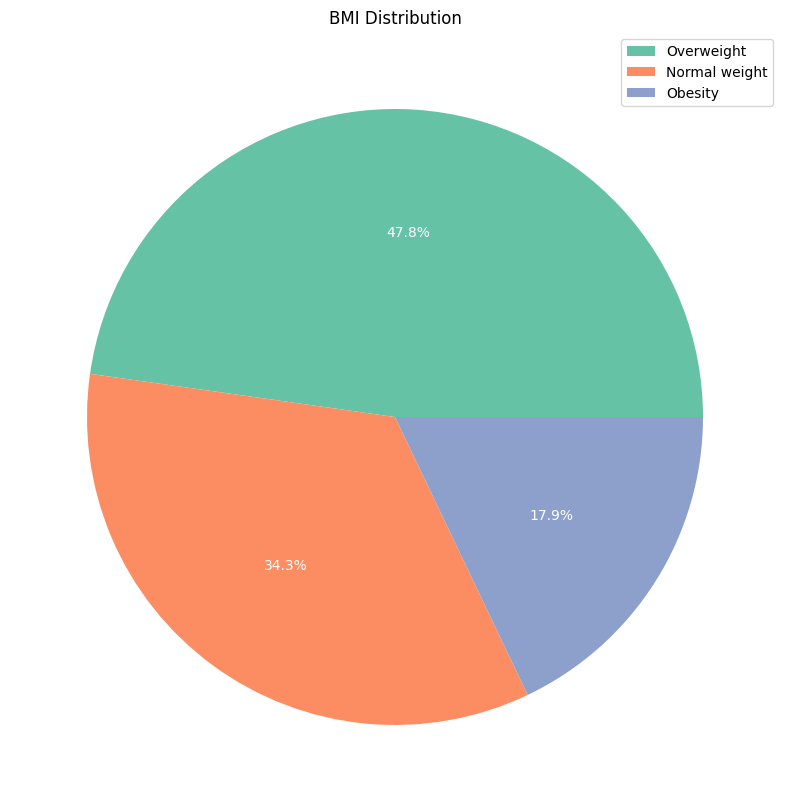

In [28]:
bmi_log_count = weight_log_info['bmi_log'].value_counts()

plt.figure(figsize = (10, 10))
plt.pie(bmi_log_count, labels = None, autopct = '%1.1f%%', textprops={'color': 'white'})
plt.title('BMI Distribution')
plt.legend(labels = bmi_log_count.index)
plt.show()

According to the graph, 47.8% of users are overweight, 17.9% are obese, and 34.3% are normal weight.

#### 6.0 Weight Vs Total Steps
Let's take a closer look at weight and total steps to see if there is any correlation between the two.

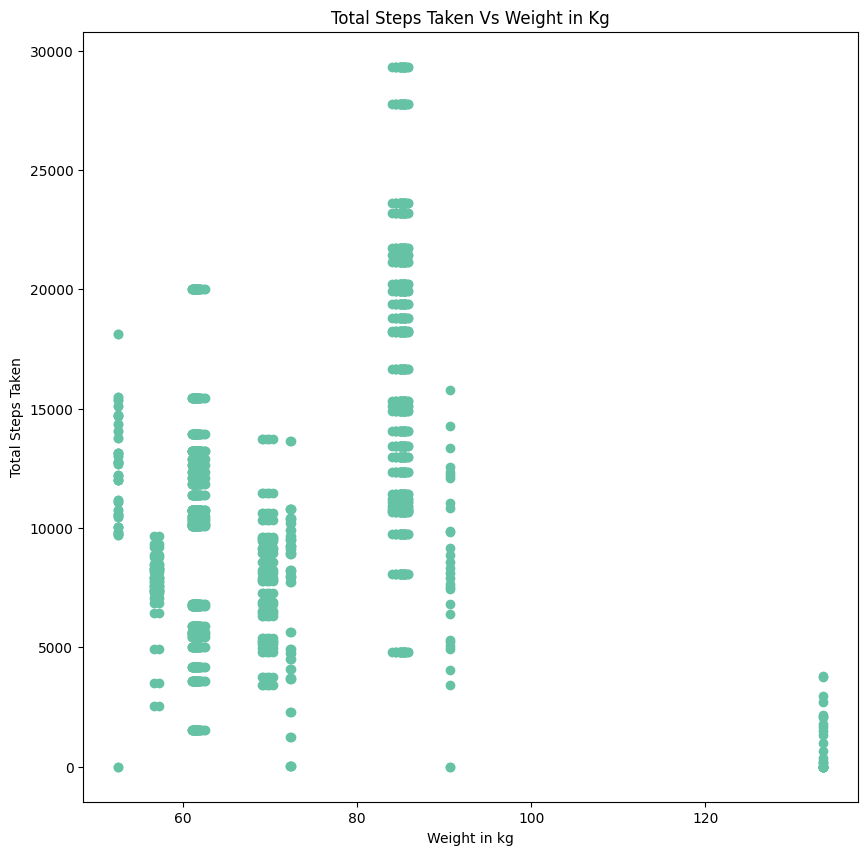

In [29]:
plt.figure(figsize = (10, 10))
plt.scatter(data = daily_activity_weight, x = 'WeightKg', y = 'TotalSteps')
plt.title('Total Steps Taken Vs Weight in Kg')
plt.xlabel('Weight in kg')
plt.ylabel('Total Steps Taken')
plt.grid(False)
plt.xticks([60, 80, 100, 120])
plt.show()

From the graph, we can conclude that majority of the users who weigh about 60 to 90 kg are the most active and users who weigh above 80 kg seem to take longer walks.

#### 7.0 User Type Distribution
Now we shall take a look into how many users are active according to their average steps taken.

In [30]:
daily_average = daily_activity_sleep.groupby('Id').agg(
    MeanTotalSteps=pd.NamedAgg(column='TotalSteps', aggfunc='mean')).reset_index()

daily_average.head()

,Id,MeanTotalSteps
0,1503960366,12116.741935
1,1644430081,7282.966667
2,1844505072,2580.064516
3,1927972279,916.129032
4,2026352035,5566.870968


According to 10000 steps,
* Sedentary: Less than 5,000 steps per day
* Low active: Between 5,000 to 7,499 steps per day
* Somewhat active: Between 7,500 to 9,999 steps per day
* Active: More than 10,000 steps per day
* Highly active: More than 12,500

With reference to average total steps taken, let's categorize each user to their respective active level.

In [31]:
daily_average['ActivityUserType'] = daily_average['MeanTotalSteps'].apply(lambda x: 
                                                                            'Sedentary' if x < 5000 else 
                                                                            ('Low Active' if 5000 <= x < 7499 else 
                                                                            ('Somewhat Active' if 7500 <= x < 9999 else 
                                                                            ('Active' if x >= 10000 else 'Highly Active'))))
daily_average.head()

,Id,MeanTotalSteps,ActivityUserType
0,1503960366,12116.741935,Active
1,1644430081,7282.966667,Low Active
2,1844505072,2580.064516,Sedentary
3,1927972279,916.129032,Sedentary
4,2026352035,5566.870968,Low Active


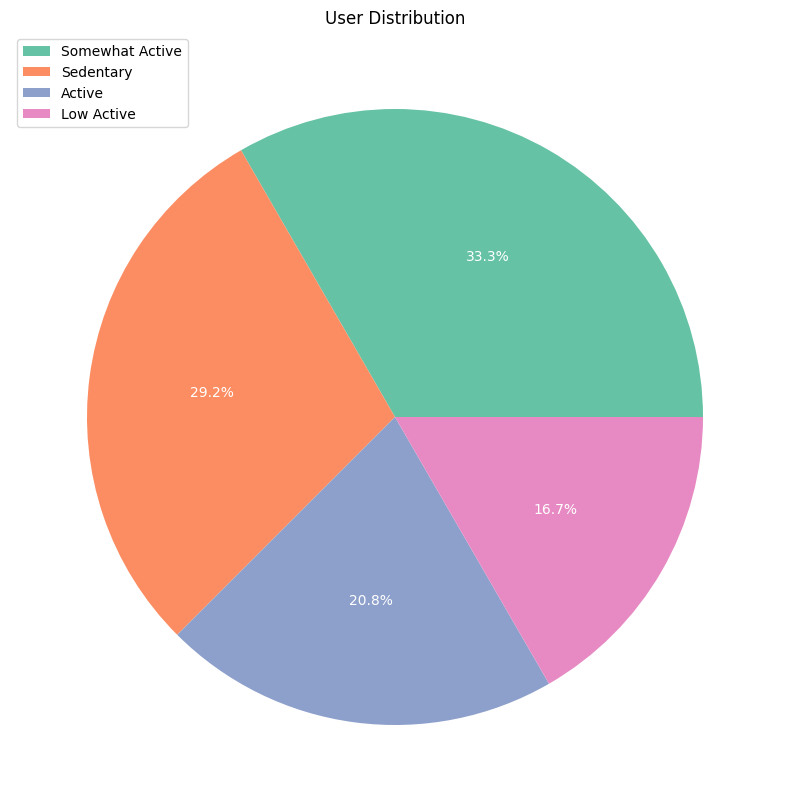

In [32]:
user_count = daily_average['ActivityUserType'].value_counts()

plt.figure(figsize = (10, 10))
plt.pie(user_count, labels = None, autopct = '%1.1f%%', textprops={'color': 'white'})
plt.title('User Distribution')
plt.legend(labels = user_count.index, loc = 'upper left')
plt.show()

From the evenly distributed pie chart, we can tell that the lowest percentage is 16.7% of the users who fall into the low active category whereas about 33.3% of the users are somewhat active.

#### 8.0 Active hours
Let's take a look at which hour the users are most active.

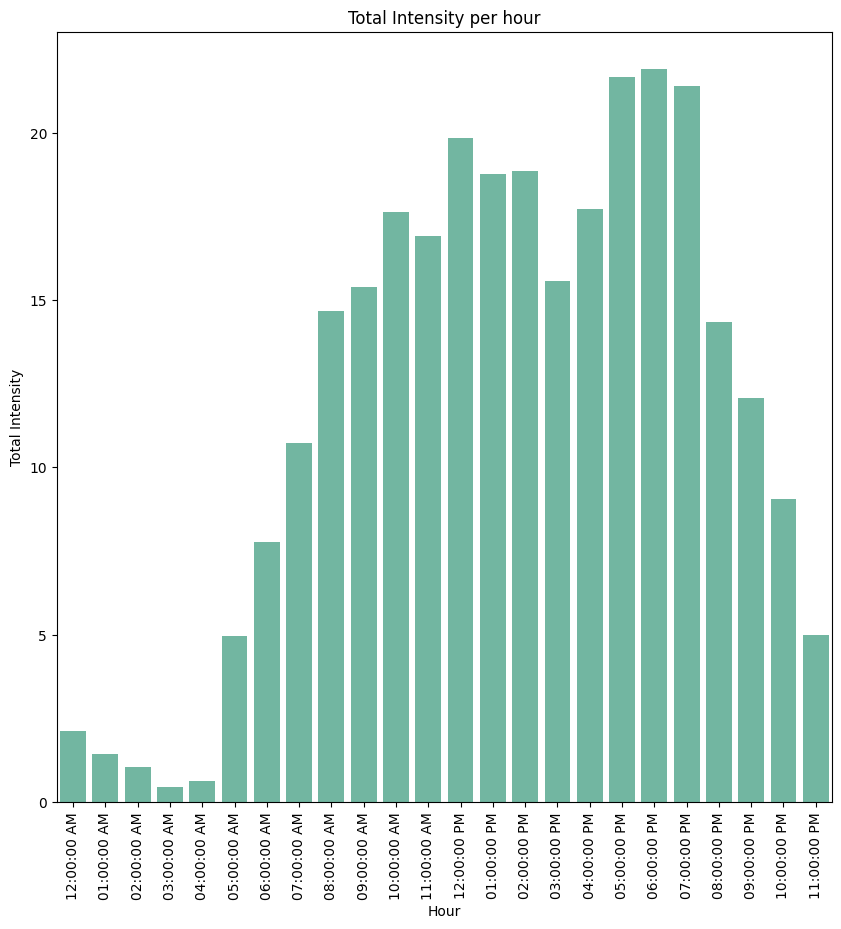

In [33]:
plt.figure(figsize = (10, 10))
sns.barplot(data = hourly_intensity, x = 'Time', y = 'TotalIntensity', errorbar=None)
plt.title('Total Intensity per hour')
plt.xlabel('Hour')
plt.ylabel('Total Intensity')
plt.xticks(rotation=90)
plt.show()

From the graph, we can see that the peak hours are from 5 pm to 7 pm.